In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf 
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("US Police shootings in from 2015-22.csv")

In [3]:
dataset

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,7678,NaN,2022-08-23,shot,unknown weapon,NaN,M,NaN,Harris County,TX,False,other,Foot,False,-95.479,29.963,True
7678,7679,NaN,2022-08-23,shot,machete,48.0,M,NaN,San Diego,CA,False,other,Not fleeing,False,-117.108,32.723,True
7679,7680,Geraldo Reyes,2022-08-23,shot,gun,32.0,M,NaN,Cut Off,LA,False,attack,NaN,False,-90.312,29.458,True
7680,7681,NaN,2022-08-23,shot,gun,NaN,M,NaN,Blue Springs,MO,False,attack,Foot,False,-94.258,39.023,True


In [4]:
dataset.drop(['id', 'name', 'state', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact','signs_of_mental_illness'], axis=1, inplace=True)

In [5]:
dataset

,date,manner_of_death,armed,age,gender,race,city,threat_level,flee
0,2015-01-02,shot,gun,53.0,M,A,Shelton,attack,Not fleeing
1,2015-01-02,shot,gun,47.0,M,W,Aloha,attack,Not fleeing
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,other,Not fleeing
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,attack,Not fleeing
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,attack,Not fleeing
...,...,...,...,...,...,...,...,...,...
7677,2022-08-23,shot,unknown weapon,NaN,M,NaN,Harris County,other,Foot
7678,2022-08-23,shot,machete,48.0,M,NaN,San Diego,other,Not fleeing
7679,2022-08-23,shot,gun,32.0,M,NaN,Cut Off,attack,NaN
7680,2022-08-23,shot,gun,NaN,M,NaN,Blue Springs,attack,Foot


In [6]:
dataset.isnull().sum()

date                  0
manner_of_death       0
armed               209
age                 472
gender               19
race               1438
city                  0
threat_level          0
flee                863
dtype: int64

In [7]:
dataset['age'] = dataset['age'].fillna(dataset['age'].mean())
dataset.fillna('UNKNOWN', inplace=True)

In [8]:
dataset

,date,manner_of_death,armed,age,gender,race,city,threat_level,flee
0,2015-01-02,shot,gun,53.000000,M,A,Shelton,attack,Not fleeing
1,2015-01-02,shot,gun,47.000000,M,W,Aloha,attack,Not fleeing
2,2015-01-03,shot and Tasered,unarmed,23.000000,M,H,Wichita,other,Not fleeing
3,2015-01-04,shot,toy weapon,32.000000,M,W,San Francisco,attack,Not fleeing
4,2015-01-04,shot,nail gun,39.000000,M,H,Evans,attack,Not fleeing
...,...,...,...,...,...,...,...,...,...
7677,2022-08-23,shot,unknown weapon,37.161997,M,UNKNOWN,Harris County,other,Foot
7678,2022-08-23,shot,machete,48.000000,M,UNKNOWN,San Diego,other,Not fleeing
7679,2022-08-23,shot,gun,32.000000,M,UNKNOWN,Cut Off,attack,UNKNOWN
7680,2022-08-23,shot,gun,37.161997,M,UNKNOWN,Blue Springs,attack,Foot


In [9]:
dataset.isnull().sum()

date               0
manner_of_death    0
armed              0
age                0
gender             0
race               0
city               0
threat_level       0
flee               0
dtype: int64

In [10]:
dataset.index = pd.DatetimeIndex(dataset.date)
dataset_prophet = dataset.resample('M').size().reset_index()
dataset_prophet.columns = ['ds', 'y']

In [11]:
dataset_prophet

,ds,y
0,2015-01-31,76
1,2015-02-28,77
2,2015-03-31,92
3,2015-04-30,84
4,2015-05-31,71
...,...,...
87,2022-04-30,90
88,2022-05-31,92
89,2022-06-30,93
90,2022-07-31,95


In [12]:
from prophet import Prophet

p = Prophet()
p.fit(dataset_prophet)

Importing plotly failed. Interactive plots will not work.
23:50:29 - cmdstanpy - INFO - Chain [1] start processing
23:50:29 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = p.make_future_dataframe(periods=1825)
forecast = p.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-31,81.302172,70.935321,95.929483,81.302172,81.302172,1.147515,1.147515,1.147515,1.147515,1.147515,1.147515,0.0,0.0,0.0,82.449687
1,2015-02-28,81.361500,64.868589,89.544209,81.361500,81.361500,-3.538101,-3.538101,-3.538101,-3.538101,-3.538101,-3.538101,0.0,0.0,0.0,77.823398
2,2015-03-31,81.427184,81.270947,104.695045,81.427184,81.427184,11.425008,11.425008,11.425008,11.425008,11.425008,11.425008,0.0,0.0,0.0,92.852191
3,2015-04-30,81.490749,70.324695,94.290575,81.490749,81.490749,1.245711,1.245711,1.245711,1.245711,1.245711,1.245711,0.0,0.0,0.0,82.736460
4,2015-05-31,81.556433,60.861678,85.731965,81.556433,81.556433,-8.337714,-8.337714,-8.337714,-8.337714,-8.337714,-8.337714,0.0,0.0,0.0,73.218719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,2027-08-26,91.054640,22.129955,46.292824,91.052205,91.057117,-56.323722,-56.323722,-56.323722,-56.323722,-56.323722,-56.323722,0.0,0.0,0.0,34.730919
1913,2027-08-27,91.056768,35.186096,58.076666,91.054330,91.059246,-44.332916,-44.332916,-44.332916,-44.332916,-44.332916,-44.332916,0.0,0.0,0.0,46.723852
1914,2027-08-28,91.058895,45.762096,69.386722,91.056455,91.061375,-33.183686,-33.183686,-33.183686,-33.183686,-33.183686,-33.183686,0.0,0.0,0.0,57.875209
1915,2027-08-29,91.061022,56.800788,79.892393,91.058580,91.063504,-22.973386,-22.973386,-22.973386,-22.973386,-22.973386,-22.973386,0.0,0.0,0.0,68.087637


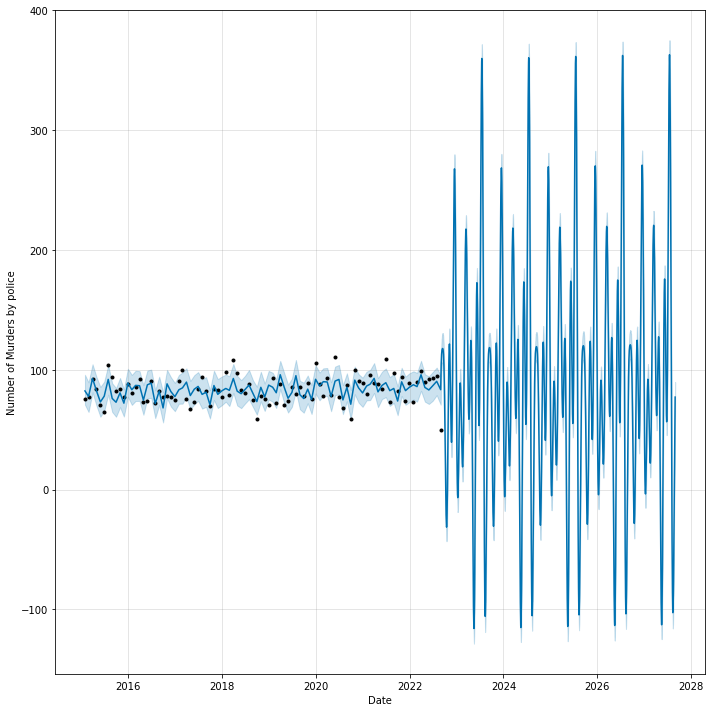

In [14]:
figure = p.plot(forecast, xlabel="Date", ylabel="Number of Murders by police", figsize=(10,10))

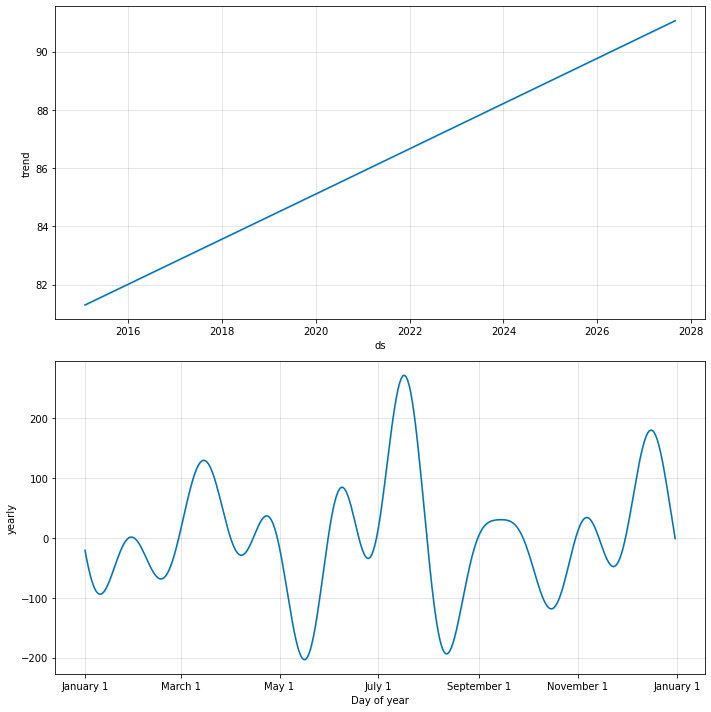

In [15]:
figure = p.plot_components(forecast,figsize=(10,10))